<a href="https://colab.research.google.com/github/ckiitd2001/Capstone/blob/master/The_Battle_of_Neighborhoods_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Part 1: A description of the problem and a discussion of the background: Opening a chinese restraunt in Mumbai**

Mumbai, formerly Bombay, city, capital of Maharashtra state, southwestern India. It is the country’s financial and commercial centre and its principal port on the Arabian Sea. Mumbai is the capital city of Maharashtra. It is one of the largest metropolitan areas in the world and India’s economic centre. The country's most important seaport, the Jawaharlal Nehru Port, is also located here. It is one of the largest natural ports worldwide and has become one of the most significant transfer sites at the Arabian Sea. The megacity generates more than a quarter of Maharashtra’s gross domestic product. Apart from that, almost half of the Indian foreign trade is transacted here. The economically most significant branches are the finance, cotton, chemical, car and electronics industry.

Mumbai attracts people from all over the India and the world at large. Understandably there are many restaurants in the City, each belonging to different categories like Chinese , Italian , French etc. As a part of this project I will try to  help my client who is looking to open a restaurant, where would you recommend that they open it?

The following are questions which I would like to solve for:

•What is best location in Mumbai  City for Chinese Cuisine ? 
•Which areas have large number of Chinese Resturant Market ? 
•Which all areas have less number of resturant ?
•Which is the best place to stay if I prefer Chinese Cuisine ?
•What places are have best restaurant in Mumbai?





**Part 2: A description of the data and how it will be used to solve the problem defined in part 1 above**

Data source on restraunts in Mumbai:

1. On Restaurants: Kaggle Zomato: This data set contains the required information. And we will use this data set to explore various locality of Mumbai.
2. On Nearby places: Foursquare:y using this api we will get all the venues in each neighborhood



  **Key Steps taken**
1. List item-•Using FourSquare find all venues for each neighborhood in Mumbai
2. List item-Filter out all venues that are nearby by locality.
3. Using aggregative rating for each resturant to find the best places.
4. Visualize the Ranking of neighborhoods using folium library(python)


In [ ]:
# Get the libraries and basic stuff 
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
! pip install geocoder
import geocoder

/bin/bash: conda: command not found


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/haanjiankur/Capstone-Project---The-Battle-of-Neighborhoods/master/zomato.csv',encoding='ISO-8859-1')
df.head(100)
df_india = df[df['Country Code'] == 1]
df_Mumbai = df_india[df_india['City'] == 'Mumbai']
df_Mumbai.reset_index(drop=True, inplace=True)
df_Mumbai.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,35217,Joey's Pizza,1,Mumbai,"6 & 7, Upvan Building, Near Indian Oil Colony,...",Azad Nagar,"Azad Nagar, Mumbai",72.829976,19.126630,Pizza,800,Indian Rupees(Rs.),No,No,No,No,2,4.0,Green,Very Good,5145
1,18447068,Cafe Hydro,1,Mumbai,"Esspee Tower, Rajendra Nagar, Dattapada Road, ...",Borivali East,"Borivali East, Mumbai",72.862381,19.221315,Asian,1000,Indian Rupees(Rs.),No,No,No,No,3,4.0,Green,Very Good,156
2,18458563,The American Joint,1,Mumbai,"The Ahcl Homes Tower, Chikuwadi New Link Road,...",Borivali West,"Borivali West, Mumbai",72.841347,19.223840,"Healthy Food, American, Burger, Salad",850,Indian Rupees(Rs.),Yes,No,No,No,2,3.4,Orange,Average,170
3,18075122,The Fusion Kitchen,1,Mumbai,"Shop 1, Opposite Veda Building, Near Bhavdevi ...",Borivali West,"Borivali West, Mumbai",72.848923,19.254567,"North Indian, Italian, Chinese, Mexican",1000,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.7,Dark Green,Excellent,2083
4,18233317,145 Kala Ghoda,1,Mumbai,"145, Kala Ghoda, Fort, Mumbai",Fort,"Fort, Mumbai",72.832585,18.927584,"Fast Food, Beverages, Desserts",1500,Indian Rupees(Rs.),No,No,No,No,3,4.2,Green,Very Good,1606


In [ ]:
#Data Wrangling remove the unwanted columns and rows from dataset¶ 

df_Res= df_Mumbai[df_Mumbai.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]
df_Res.head()


,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,Joey's Pizza,Azad Nagar,72.829976,19.126630,Pizza,4.0,Very Good,5145
1,Cafe Hydro,Borivali East,72.862381,19.221315,Asian,4.0,Very Good,156
2,The American Joint,Borivali West,72.841347,19.223840,"Healthy Food, American, Burger, Salad",3.4,Average,170
3,The Fusion Kitchen,Borivali West,72.848923,19.254567,"North Indian, Italian, Chinese, Mexican",4.7,Excellent,2083
4,145 Kala Ghoda,Fort,72.832585,18.927584,"Fast Food, Beverages, Desserts",4.2,Very Good,1606


In [ ]:
#created map to show the restaurant cluters¶ 

Mumbai_Rest = folium.Map(location=[19.2,72.9], zoom_start=14)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Mumbai_Rest)  
Mumbai_Rest
#Please move the curser, else you may be seeing just the water part in the map

In [ ]:
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes,Cluster
0,Joey's Pizza,Azad Nagar,72.829976,19.126630,Pizza,4.0,Very Good,5145,1
1,Cafe Hydro,Borivali East,72.862381,19.221315,Asian,4.0,Very Good,156,3
2,The American Joint,Borivali West,72.841347,19.223840,"Healthy Food, American, Burger, Salad",3.4,Average,170,3
3,The Fusion Kitchen,Borivali West,72.848923,19.254567,"North Indian, Italian, Chinese, Mexican",4.7,Excellent,2083,3
4,145 Kala Ghoda,Fort,72.832585,18.927584,"Fast Food, Beverages, Desserts",4.2,Very Good,1606,2


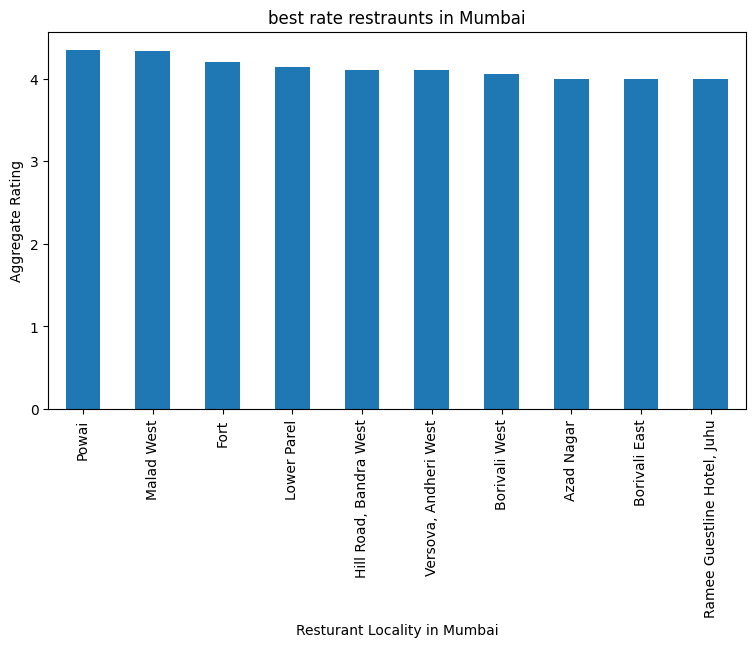

In [ ]:
#Best places for restraunts in Mumbai 

import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('best rate restraunts in Mumbai')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Mumbai')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

Powai and Malad have best restraunts

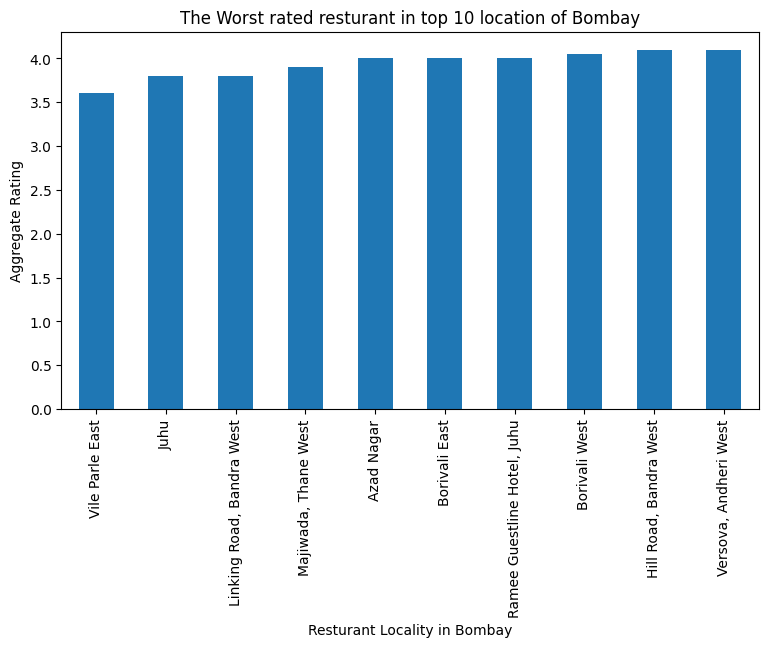

In [ ]:

#Worst  places for restraunts in Mumbai 


import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 location of Bombay')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Bombay')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()


Vile Parle and Juhu have worst restraunts

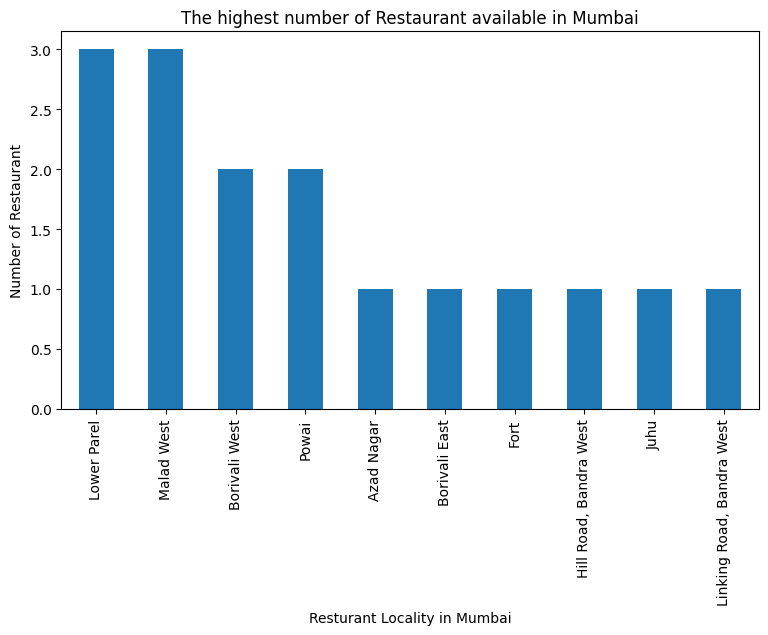

In [ ]:
#Which place are suitable for foodie in Mumbai

import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Mumbai')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Mumbai')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

Biggest number of restraunts are in Loer Parel and Malad. This is the best place for foodie to live

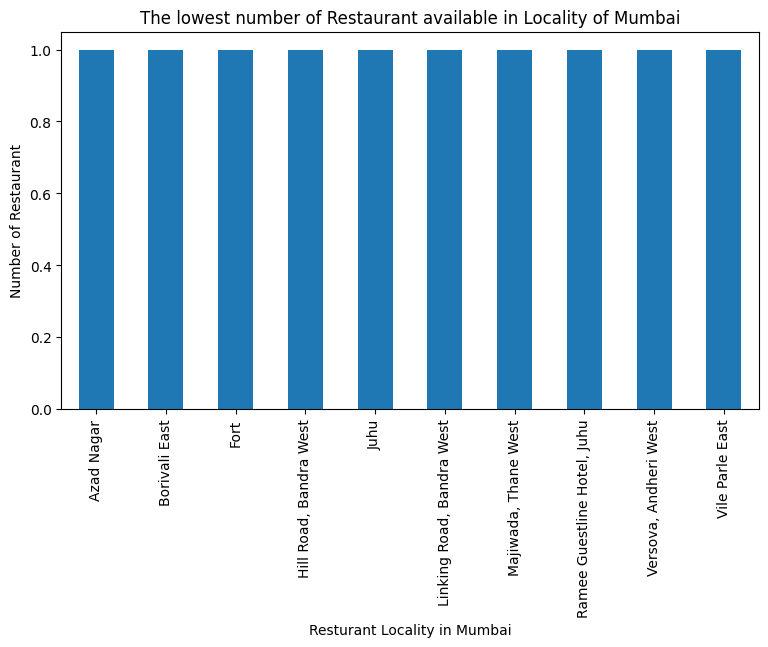

In [ ]:
#worst place for foodie to live

import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The lowest number of Restaurant available in Locality of Mumbai')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Mumbai')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

In [ ]:
#What are the best places for chinese restaurant in Mumbai

import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for chinese restaurant in Mumbai')
#On x-axis

#giving a bar plot

df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nsmallest(2).plot(kind='bar')


plt.xlabel('Resturant Locality in Mumbai')
#On y-axis
plt.ylabel('Number of Chinese Restaurant')

#displays the plot
plt.show()

In [ ]:
# which places are the best chinese resturants in New Delhi?¶ 

import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best places for Chinese restaurant in New Delhi city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in New Delhi')
#On y-axis
plt.ylabel('Rating of resturants')

#displays the plot
plt.show()

In [ ]:
# Data Transpfrmation
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')

df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,Azad Nagar,19.126630,72.829976,1,Pizza,4.00,Very Good,5145
1,Borivali East,19.221315,72.862381,1,Asian,4.00,Very Good,156
2,Borivali West,19.239203,72.845135,2,"Healthy Food, American, Burger, Salad, North I...",4.05,"Average, Excellent",2253
3,Fort,18.927584,72.832585,1,"Fast Food, Beverages, Desserts",4.20,Very Good,1606
4,"Hill Road, Bandra West",19.055831,72.833984,1,"Cafe, Italian, Desserts, Fast Food, Chinese, Tea",4.10,Very Good,2040


In [73]:
df_final.shape



(14, 8)

In [74]:
# Foursquare 

## Define Foursquare Credentials and Version
CLIENT_ID = 'Y4FOYJESJXDKTRUWIEZ35NO2CHZWYSRVBJQTUMA5RK5NMGYL' # Foursquare ID
CLIENT_SECRET = 'VPI5IP0QRM33LF1OXZV4BYJSXEQ2V5PHDSNRDNFYUMYJYIEX' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: Y4FOYJESJXDKTRUWIEZ35NO2CHZWYSRVBJQTUMA5RK5NMGYL
CLIENT_SECRET:VPI5IP0QRM33LF1OXZV4BYJSXEQ2V5PHDSNRDNFYUMYJYIEX


In [76]:
## create a function to repeat the same process to all the Locality in Mumbai

def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [80]:

# find the venues in all Mumbai Locality
Mumbai_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng'])


Azad Nagar
Borivali East
Borivali West
Fort
Hill Road, Bandra West
Juhu
Linking Road, Bandra West
Lower Parel
Majiwada, Thane West
Malad West
Powai
Ramee Guestline Hotel, Juhu
Versova, Andheri West
Vile Parle East


In [81]:
Mumbai_venues.groupby('Locality').count()




,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
Azad Nagar,8,8,8,8,8,8
Borivali East,9,9,9,9,9,9
Borivali West,11,11,11,11,11,11
Fort,32,32,32,32,32,32
"Hill Road, Bandra West",34,34,34,34,34,34
Juhu,25,25,25,25,25,25
"Linking Road, Bandra West",33,33,33,33,33,33
Lower Parel,58,58,58,58,58,58
"Majiwada, Thane West",36,36,36,36,36,36


In [82]:
print('There are {} uniques categories.'.format(len(Mumbai_venues['Venue Category'].unique())))



There are 116 uniques categories.


In [83]:
## Analyze Each Locality

# one hot encoding
Mumbai_onehot = pd.get_dummies(Mumbai_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
Mumbai_onehot['Locality'] = Mumbai_venues['Locality'] 

# move Locality column to the first column
column_list = Mumbai_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
Mumbai_onehot = Mumbai_onehot[column_list]

Mumbai_onehot.head()


,Locality,Accessories Store,Airport,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,Automotive Shop,BBQ Joint,Bakery,Bar,Beach,Bed & Breakfast,Beer Garden,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Building,Burger Joint,Bus Line,Bus Station,Café,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,...,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Multiplex,Music Venue,New American Restaurant,Nightclub,North Indian Restaurant,Office,Outdoors & Recreation,Park,Pizza Place,Pool,Pub,Punjabi Restaurant,Recreation Center,Residential Building (Apartment / Condo),Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Smoke Shop,Snack Place,Soccer Stadium,Spa,Sports Bar,Steakhouse,Sushi Restaurant,Tea Room,Theater,Toy / Game Store,Track,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Women's Store
0,Azad Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Azad Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Azad Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Azad Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Azad Nagar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [84]:
Mumbai_grouped = Mumbai_onehot.groupby('Locality').mean().reset_index()
Mumbai_grouped

,Locality,Accessories Store,Airport,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,Automotive Shop,BBQ Joint,Bakery,Bar,Beach,Bed & Breakfast,Beer Garden,Bike Rental / Bike Share,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Building,Burger Joint,Bus Line,Bus Station,Café,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,...,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Multiplex,Music Venue,New American Restaurant,Nightclub,North Indian Restaurant,Office,Outdoors & Recreation,Park,Pizza Place,Pool,Pub,Punjabi Restaurant,Recreation Center,Residential Building (Apartment / Condo),Restaurant,Road,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Smoke Shop,Snack Place,Soccer Stadium,Spa,Sports Bar,Steakhouse,Sushi Restaurant,Tea Room,Theater,Toy / Game Store,Track,Train Station,Travel & Transport,Vegetarian / Vegan Restaurant,Women's Store
0,Azad Nagar,0.125,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.00000,0.0000,0.000000,0.00000,0.000000,0.125,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.125000,0.00,0.000000,0.000000,0.000000,0.125,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125000
1,Borivali East,0.000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.111111,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.111111,0.00,0.000000,0.00000,0.0000,0.000000,0.00000,0.000000,0.000,0.00000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.111111,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Borivali West,0.000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.00000,0.0000,0.000000,0.00000,0.000000,0.000,0.00000,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.090909,0.000000,...,0.00000,0.000000,0.000000,0.090909,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000,0.181818,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Fort,0.000,0.00,0.000000,0.000000,0.03125,0.000000,0.031250,0.00,0.000000,0.000000,0.000000,0.062500,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.03125,0.0625,0.031250,0.00000,0.000000,0.000,0.00000,0.156250,0.000000,0.031250,0.000000,0.000000,0.031250,0.000000,0.000000,0.00000,0.000000,0.031250,0.000000,0.031250,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.03125,0.031250,0.00000,0.000000,0.000000,0.000000,0.031250,0.00,0.031250,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,"Hill Road, Bandra West",0.000,0.00,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.029412,0.000000,0.029412,0.000000,0.000

In [85]:


## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [87]:
## create the new dataframe and display the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = Mumbai_grouped['Locality']

for ind in np.arange(Mumbai_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Mumbai_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Azad Nagar,Women's Store,Residential Building (Apartment / Condo),Bus Line,Gym / Fitness Center,Indian Restaurant,Liquor Store,Pizza Place,Accessories Store,Sushi Restaurant,Donut Shop
1,Borivali East,Indian Restaurant,Shopping Mall,Department Store,Automotive Shop,Bike Rental / Bike Share,Garden Center,Café,Cupcake Shop,Deli / Bodega,Creperie
2,Borivali West,Café,Restaurant,Lounge,Italian Restaurant,Snack Place,Dessert Shop,Market,Multiplex,Cupcake Shop,Dumpling Restaurant
3,Fort,Café,Indian Restaurant,Breakfast Spot,Bar,Pizza Place,Brewery,Pub,Dessert Shop,History Museum,Japanese Restaurant
4,"Hill Road, Bandra West",Indian Restaurant,Café,Gourmet Shop,Snack Place,Coffee Shop,Chinese Restaurant,Burger Joint,Pizza Place,Park,German Restaurant
5,Juhu,Hotel,Italian Restaurant,Restaurant,Bistro,Nightclub,Clothing Store,Café,Department Store,Pool,Dessert Shop
6,"Linking Road, Bandra West",Indian Restaurant,Dessert Shop,Seafood Restaurant,Bar,Lounge,Arcade,Asian Restaurant,Bakery,Road,Salad Place
7,Lower Parel,Indian Restaurant,Clothing Store,Shopping Mall,Café,Pizza Place,Chinese Restaurant,Italian Restaurant,Pub,Restaurant,Asian Restaurant
8,"Majiwada, Thane West",Indian Restaurant,Clothing Store,Italian Restaurant,Chinese Restaurant,Fast Food Restaurant,Hotel,Department Store,Restaurant,Donut Shop,Punjabi Restaurant
9,Malad West,Coffee Shop,Café,Gym / Fitness Center,Fast Food Restaurant,Shopping Mall,Chinese Restaurant,Men's Store,Outdoors & Recreation,Pizza Place,Dessert Shop


In [89]:

## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

Mumbai_clustering = Mumbai_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Mumbai_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape


(14,)

In [90]:
# add clustering labels
Mumbai_merged = df_final.head(240)
Mumbai_merged['Cluster Labels'] = kmeans.labels_

# merge with df_Chinese to add latitude/longitude for each Locality
Mumbai_merged = Mumbai_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

Mumbai_merged.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Azad Nagar,19.126630,72.829976,1,Pizza,4.00,Very Good,5145,3,Women's Store,Residential Building (Apartment / Condo),Bus Line,Gym / Fitness Center,Indian Restaurant,Liquor Store,Pizza Place,Accessories Store,Sushi Restaurant,Donut Shop
1,Borivali East,19.221315,72.862381,1,Asian,4.00,Very Good,156,1,Indian Restaurant,Shopping Mall,Department Store,Automotive Shop,Bike Rental / Bike Share,Garden Center,Café,Cupcake Shop,Deli / Bodega,Creperie
2,Borivali West,19.239203,72.845135,2,"Healthy Food, American, Burger, Salad, North I...",4.05,"Average, Excellent",2253,2,Café,Restaurant,Lounge,Italian Restaurant,Snack Place,Dessert Shop,Market,Multiplex,Cupcake Shop,Dumpling Restaurant
3,Fort,18.927584,72.832585,1,"Fast Food, Beverages, Desserts",4.20,Very Good,1606,0,Café,Indian Restaurant,Breakfast Spot,Bar,Pizza Place,Brewery,Pub,Dessert Shop,History Museum,Japanese Restaurant
4,"Hill Road, Bandra West",19.055831,72.833984,1,"Cafe, Italian, Desserts, Fast Food, Chinese, Tea",4.10,Very Good,2040,0,Indian Restaurant,Café,Gourmet Shop,Snack Place,Coffee Shop,Chinese Restaurant,Burger Joint,Pizza Place,Park,German Restaurant


In [92]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Mumbai_merged['Lat'], Mumbai_merged['Lng'], Mumbai_merged['Locality'], Mumbai_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [93]:
## Examine Clusters

## Cluster 1
Mumbai_merged.loc[Mumbai_merged['Cluster Labels'] == 0, Mumbai_merged.columns[[1] + list(range(5, Mumbai_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,18.927584,4.200000,Very Good,1606,0,Café,Indian Restaurant,Breakfast Spot,Bar,Pizza Place,Brewery,Pub,Dessert Shop,History Museum,Japanese Restaurant
4,19.055831,4.100000,Very Good,2040,0,Indian Restaurant,Café,Gourmet Shop,Snack Place,Coffee Shop,Chinese Restaurant,Burger Joint,Pizza Place,Park,German Restaurant
5,19.091458,3.800000,Good,617,0,Hotel,Italian Restaurant,Restaurant,Bistro,Nightclub,Clothing Store,Café,Department Store,Pool,Dessert Shop
6,19.065838,3.800000,Good,146,0,Indian Restaurant,Dessert Shop,Seafood Restaurant,Bar,Lounge,Arcade,Asian Restaurant,Bakery,Road,Salad Place
7,18.997268,4.133333,"Good, Very Good",6686,0,Indian Restaurant,Clothing Store,Shopping Mall,Café,Pizza Place,Chinese Restaurant,Italian Restaurant,Pub,Restaurant,Asian Restaurant
8,19.207222,3.900000,Good,317,0,Indian Restaurant,Clothing Store,Italian Restaurant,Chinese Restaurant,Fast Food Restaurant,Hotel,Department Store,Restaurant,Donut Shop,Punjabi Restaurant
9,19.178630,4.333333,"Excellent, Good",3960,0,Coffee Shop,Café,Gym / Fitness Center,Fast Food Restaurant,Shopping Mall,Chinese Restaurant,Men's Store,Outdoors & Recreation,Pizza Place,Dessert Shop
10,19.121041,4.350000,"Excellent, Good",3425,0,Indian Restaurant,Bar,Café,Chinese Restaurant,Italian Restaurant,Asian Restaurant,North Indian Restaurant,Cupcake Shop,Bus Station,Clothing Store
11,19.109300,4.000000,Very Good,536,0,Chinese Restaurant,Indian Restaurant,Café,Bar,Asian Restaurant,Cocktail Bar,Lounge,Hotel,Coffee Shop,Gym / Fitness Center


In [94]:
## Examine Clusters

## Cluster 2
Mumbai_merged.loc[Mumbai_merged['Cluster Labels'] == 1, Mumbai_merged.columns[[1] + list(range(5, Mumbai_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,19.221315,4.0,Very Good,156,1,Indian Restaurant,Shopping Mall,Department Store,Automotive Shop,Bike Rental / Bike Share,Garden Center,Café,Cupcake Shop,Deli / Bodega,Creperie


In [96]:

## Examine Clusters

## Cluster 3
Mumbai_merged.loc[Mumbai_merged['Cluster Labels'] == 2, Mumbai_merged.columns[[1] + list(range(5, Mumbai_merged.shape[1]))]]


,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,19.239203,4.05,"Average, Excellent",2253,2,Café,Restaurant,Lounge,Italian Restaurant,Snack Place,Dessert Shop,Market,Multiplex,Cupcake Shop,Dumpling Restaurant
12,19.131141,4.10,Very Good,1295,2,Café,Ice Cream Shop,Bar,Coffee Shop,Pizza Place,Diner,Recreation Center,Salon / Barbershop,Film Studio,Seafood Restaurant


In [97]:
## Examine Clusters

## Cluster 4
Mumbai_merged.loc[Mumbai_merged['Cluster Labels'] == 3, Mumbai_merged.columns[[1] + list(range(5, Mumbai_merged.shape[1]))]]


,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,19.12663,4.0,Very Good,5145,3,Women's Store,Residential Building (Apartment / Condo),Bus Line,Gym / Fitness Center,Indian Restaurant,Liquor Store,Pizza Place,Accessories Store,Sushi Restaurant,Donut Shop


In [98]:
## Examine Clusters

## Cluster 5
Mumbai_merged.loc[Mumbai_merged['Cluster Labels'] == 4, Mumbai_merged.columns[[1] + list(range(5, Mumbai_merged.shape[1]))]]



,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,19.103249,3.6,Good,1515,4,Tea Room,Diner,Travel & Transport,Train Station,Chinese Restaurant,Multiplex,Juice Bar,Maharashtrian Restaurant,Market,Martial Arts School
